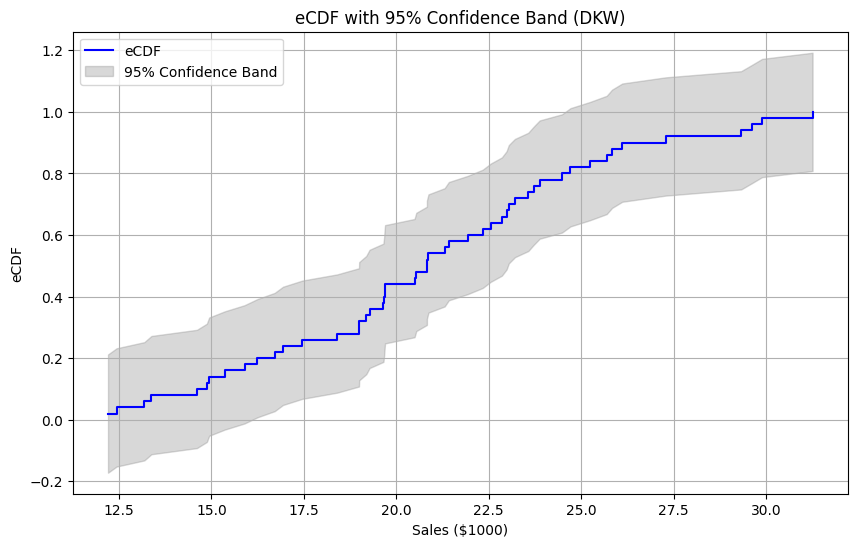

In [43]:
# Q8 part b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "Monthly_Sales_Data.csv"
data = pd.read_csv(file_path)

sales_data = data['Monthly_Sales_k$'].values

data_sorted = np.sort(sales_data)
n = len(data_sorted)
ecdf = np.arange(1, n + 1) / n

alpha = 0.05
epsilon = np.sqrt(np.log(2 / alpha) / (2 * n))
lower_bound = ecdf - epsilon
upper_bound = ecdf + epsilon

plt.figure(figsize=(10, 6))
plt.step(data_sorted, ecdf, where="post", label="eCDF", color="blue")
plt.fill_between(data_sorted, lower_bound, upper_bound, color='gray', alpha=0.3, label="95% Confidence Band")
plt.title("eCDF with 95% Confidence Band (DKW)")
plt.xlabel("Sales ($1000)")
plt.ylabel("eCDF")
plt.legend()
plt.grid()
plt.show()


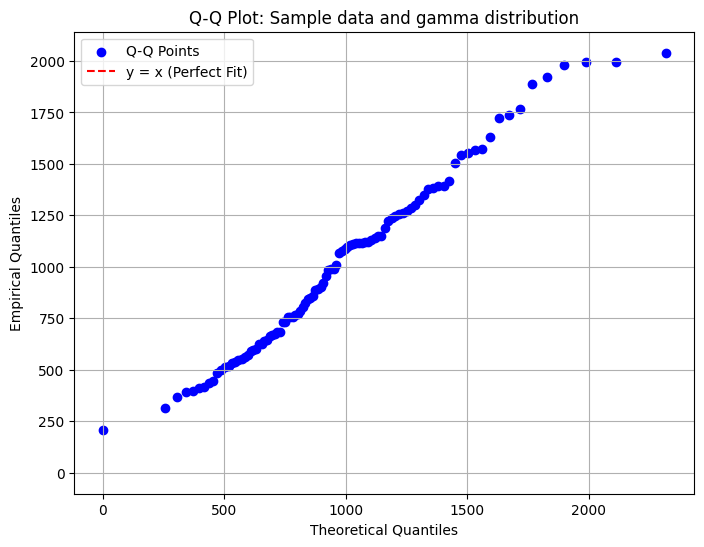

Box-Cox Transformation Lambda: 0.4665543271943499


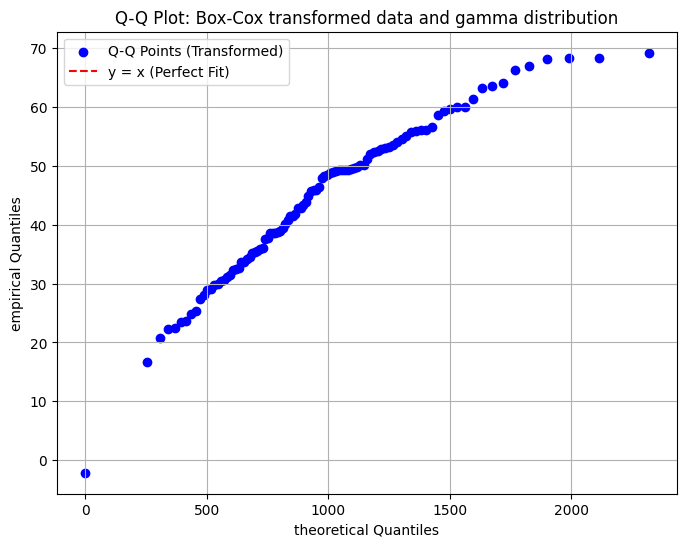

In [41]:
# Q9 part b
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# part a
np.random.seed(0)
k = 5
theta = 200
n = 100
simulated_data = np.random.gamma(shape=k, scale=theta, size=n)

# part b
sample_quantiles = np.percentile(simulated_data, np.linspace(0, 100, n))

# part c
quantiles = stats.gamma.ppf(np.linspace(0, 1, n), a=k, scale=theta)
empirical_quantiles = np.sort(simulated_data)


plt.figure(figsize=(8, 6))
plt.scatter(quantiles, empirical_quantiles, color='blue', label='Q-Q Points')
plt.plot([min(quantiles), max(quantiles)],
         [min(quantiles), max(quantiles)],
         color='red', linestyle='--', label='y = x (Perfect Fit)')
plt.title('Q-Q Plot: Sample data and gamma distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Empirical Quantiles')
plt.legend()
plt.grid()
plt.show()

# part d
transformed_data, lambda_ = stats.boxcox(simulated_data - min(simulated_data) + 1e-6)
print(f"Box-Cox Transformation Lambda: {lambda_}")
empirical_quantiles_transformed = np.sort(transformed_data)

plt.figure(figsize=(8, 6))
plt.scatter(quantiles, empirical_quantiles_transformed, color='blue', label='Q-Q Points (Transformed)')
plt.plot([min(quantiles), max(quantiles)],
         [min(quantiles), max(quantiles)],
         color='red', linestyle='--', label='y = x (Perfect Fit)')
plt.title('Q-Q Plot: Box-Cox transformed data and gamma distribution')
plt.xlabel('theoretical Quantiles')
plt.ylabel('empirical Quantiles')
plt.legend()
plt.grid()
plt.show()


Kolmogorov-Smirnov: 0.12
P-value: 0.23078236357216822
critical Value (alpha=0.05): 0.15680833311190237
Fail to reject the NUL Hypothesis: The distributions are similar.


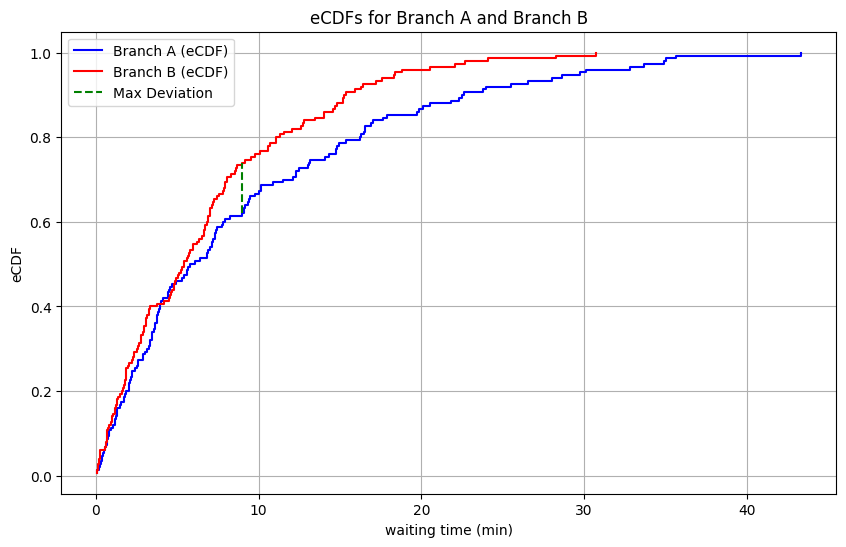

In [37]:
#Q10 part b
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# part a
np.random.seed(42)  
n_a = 150  
n_b = 150 

lambda_a = 0.1  
lambda_b = 0.15  
branch_a = np.random.exponential(1 / lambda_a, n_a)
branch_b = np.random.exponential(1 / lambda_b, n_b)


# part b
def ecdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y


x_a, y_a = ecdf(branch_a)
x_b, y_b = ecdf(branch_b)

# part c
ks_stat, p_value = ks_2samp(branch_a, branch_b)
critical_value = 1.358 * np.sqrt((n_a + n_b) / (n_a * n_b))  

print(f"Kolmogorov-Smirnov: {ks_stat}")
print(f"P-value: {p_value}")
print(f"critical Value (alpha=0.05): {critical_value}")

if ks_stat > critical_value:
    print("Reject the NULL hypothesis: The distributions are different.")
else:
    print("Fail to reject the NUL Hypothesis: The distributions are similar.")

# part d
plt.figure(figsize=(10, 6))
plt.step(x_a, y_a, label="Branch A (eCDF)", color="blue", where="post")
plt.step(x_b, y_b, label="Branch B (eCDF)", color="red", where="post")

max_dev_x = np.linspace(min(np.concatenate([branch_a, branch_b])), max(np.concatenate([branch_a, branch_b])), 1000)
max_dev_y_a = np.interp(max_dev_x, x_a, y_a, left=0, right=1)
max_dev_y_b = np.interp(max_dev_x, x_b, y_b, left=0, right=1)
max_dev = np.abs(max_dev_y_a - max_dev_y_b)
max_dev_idx = np.argmax(max_dev)
plt.vlines(max_dev_x[max_dev_idx], max_dev_y_a[max_dev_idx], max_dev_y_b[max_dev_idx], color="green", linestyle="--",
           label="Max Deviation")

plt.title("eCDFs for Branch A and Branch B")
plt.xlabel("waiting time (min)")
plt.ylabel("eCDF")
plt.legend()
plt.grid()
plt.show()


Silverman's rule of Thumb bandwidth: 28.38


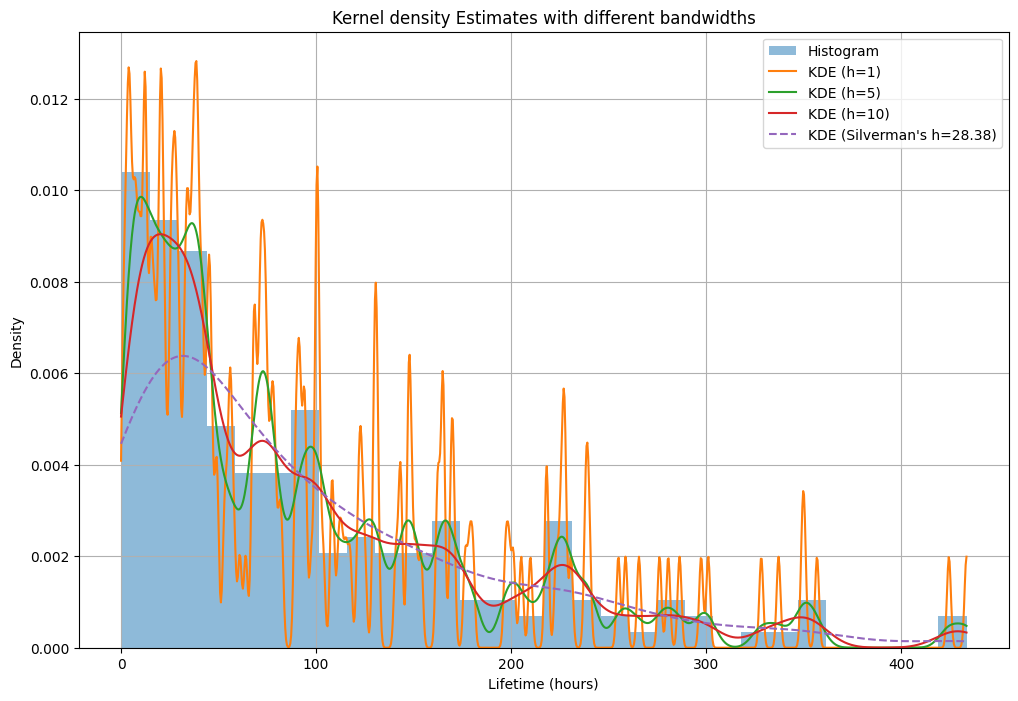

In [27]:
#Q11 part b
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# part a
np.random.seed(42)
n = 200  
rate = 0.01 
data = np.random.exponential(1 / rate, n)


# part b
def compute_kde(data, bandwidth):
    kde = gaussian_kde(data, bw_method=bandwidth / np.std(data))
    return kde


bandwidths = [1, 5, 10]
kdes = {h: compute_kde(data, h) for h in bandwidths}


# part c
def silverman_bandwidth(data):
    std_dev = np.std(data)
    n = len(data)
    h = 0.9 * std_dev * n ** (-1 / 5) 
    return h


silverman_h = silverman_bandwidth(data)
kde_silverman = compute_kde(data, silverman_h)
print(f"Silverman's rule of Thumb bandwidth: {silverman_h:.2f}")

# part d
x = np.linspace(0, np.max(data), 1000)  # Points for evaluating the KDE

plt.figure(figsize=(12, 8))
plt.hist(data, bins=30, density=True, alpha=0.5, label="Histogram")

for h, kde in kdes.items():
    plt.plot(x, kde(x), label=f"KDE (h={h})")

plt.plot(x, kde_silverman(x), label=f"KDE (Silverman's h={silverman_h:.2f})", linestyle="--")

plt.title("Kernel density Estimates with different bandwidths")
plt.xlabel("Lifetime (hours)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


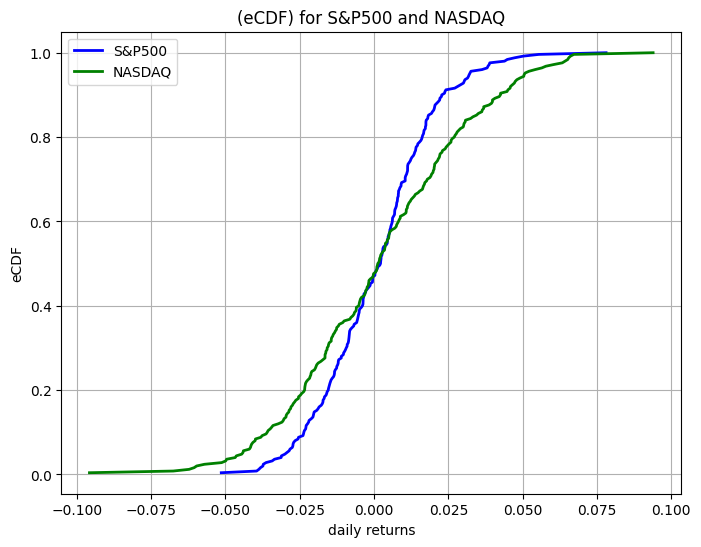

Null hypothesis rejected: (p-value = 0.0061)


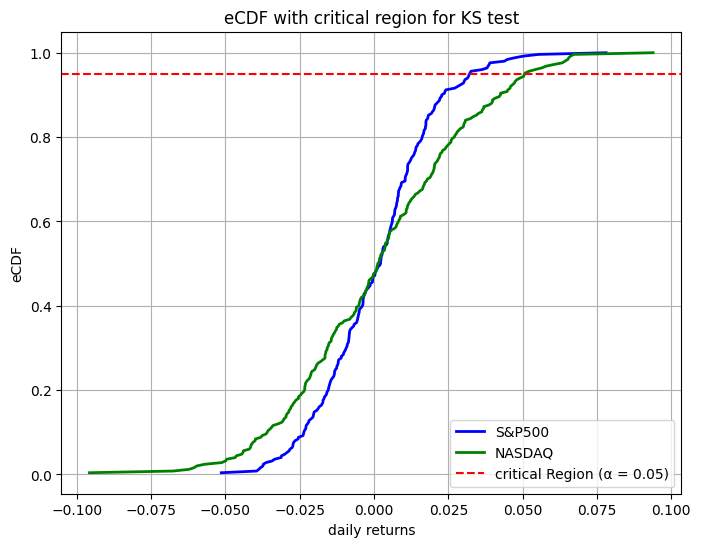

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# part 1
np.random.seed(42)

mu_sp500 = 0.001
sigma_sp500 = 0.02
mu_nasdaq = 0.0015
sigma_nasdaq = 0.03

sp500_returns = np.random.normal(mu_sp500, sigma_sp500, 250)
nasdaq_returns = np.random.normal(mu_nasdaq, sigma_nasdaq, 250)

# part 2
sorted_sp500 = np.sort(sp500_returns)
ecdf_sp500 = np.arange(1, len(sorted_sp500) + 1) / len(sorted_sp500)

sorted_nasdaq = np.sort(nasdaq_returns)
ecdf_nasdaq = np.arange(1, len(sorted_nasdaq) + 1) / len(sorted_nasdaq)

# part 3
ks_stat, p_value = ks_2samp(sp500_returns, nasdaq_returns)

# part4
plt.figure(figsize=(8, 6))

plt.plot(sorted_sp500, ecdf_sp500, color='blue', label="S&P500", linewidth=2)
plt.plot(sorted_nasdaq, ecdf_nasdaq, color='green', label="NASDAQ", linewidth=2)

plt.title('(eCDF) for S&P500 and NASDAQ')
plt.xlabel('daily returns')
plt.ylabel('eCDF')
plt.legend()
plt.grid(True)
plt.show()

# part5.
alpha = 0.05

if p_value < alpha:
    print(f"Null hypothesis rejected: (p-value = {p_value:.4f})")
else:
    print(f"fail to reject the null hypothesis: (p-value = {p_value:.4f})")

plt.figure(figsize=(8, 6))

plt.plot(sorted_sp500, ecdf_sp500, color='blue', label="S&P500", linewidth=2)
plt.plot(sorted_nasdaq, ecdf_nasdaq, color='green', label="NASDAQ", linewidth=2)

plt.axhline(y=1 - alpha, color='red', linestyle='--', label=f'critical Region (α = {alpha})')

plt.title('eCDF with critical region for KS test')
plt.xlabel('daily returns')
plt.ylabel('eCDF')
plt.legend()
plt.grid(True)

plt.show()


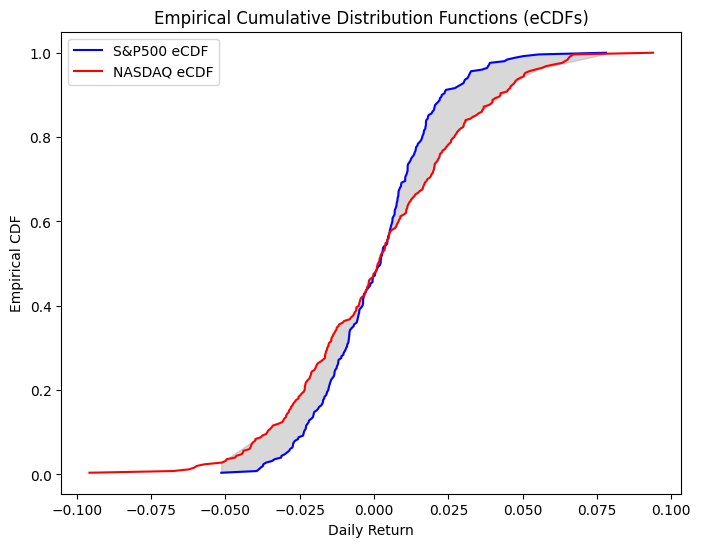

Kolmogorov-Smirnov Test Statistic: 0.1520
P-value: 0.0061
The null hypothesis is rejected: The distributions of the returns of the two indices are significantly different.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
mu_sp500 = 0.001
sigma_sp500 = 0.02

mu_nasdaq = 0.0015
sigma_nasdaq = 0.03

n = 250
sp500_returns = np.random.normal(mu_sp500, sigma_sp500, n)
nasdaq_returns = np.random.normal(mu_nasdaq, sigma_nasdaq, n)


# part2
def ecdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(data) + 1) / len(data)
    return sorted_data, cdf


sp500_sorted, sp500_cdf = ecdf(sp500_returns)
nasdaq_sorted, nasdaq_cdf = ecdf(nasdaq_returns)

# part3
ks_stat, ks_p_value = stats.ks_2samp(sp500_returns, nasdaq_returns)

# part4
plt.figure(figsize=(8, 6))
plt.plot(sp500_sorted, sp500_cdf, label="S&P500 eCDF", color='blue')
plt.plot(nasdaq_sorted, nasdaq_cdf, label="NASDAQ eCDF", color='red')
plt.xlabel('Daily Return')
plt.ylabel('Empirical CDF')
plt.title('Empirical Cumulative Distribution Functions (eCDFs)')
plt.legend()

ks_max_dev = np.max(np.abs(sp500_cdf - np.interp(sp500_sorted, nasdaq_sorted, nasdaq_cdf)))
plt.fill_between(sp500_sorted, sp500_cdf, np.interp(sp500_sorted, nasdaq_sorted, nasdaq_cdf), color='gray', alpha=0.3,
                 label=f'Max Vertical Deviation: {ks_max_dev:.4f}')

plt.show()

#part5
alpha = 0.05
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}")
print(f"P-value: {ks_p_value:.4f}")

if ks_p_value < alpha:
    print(
        "The null hypothesis is rejected: The distributions of the returns of the two indices are significantly different.")
else:
    print(
        "The null hypothesis is not rejected: The distributions of the returns of the two indices do not have a significant difference.")


In [17]:
import math
import scipy.stats as stats

n1 = 200
x1 = 120
n2 = 250
x2 = 140

p1 = x1 / n1
p2 = x2 / n2

p_pooled = (x1 + x2) / (n1 + n2)

se = math.sqrt(p_pooled * (1 - p_pooled) * (1 / n1 + 1 / n2))

z = (p1 - p2) / se

p_value = 2 * (1 - stats.norm.cdf(abs(z)))

z_critical = stats.norm.ppf(0.975)
margin_of_error = z_critical * se
ci_lower = (p1 - p2) - margin_of_error
ci_upper = (p1 - p2) + margin_of_error

# Output the results
print(f"Proportion for campaign 1: {p1:.4f}")
print(f"Proportion for campaign 2: {p2:.4f}")
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"95% Confidence Interval for the difference: ({ci_lower:.4f}, {ci_upper:.4f})")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two campaigns.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two campaigns.")



Proportion for campaign 1: 0.6000
Proportion for campaign 2: 0.5600
Z-statistic: 0.8537
P-value: 0.3933
95% Confidence Interval for the difference: (-0.0518, 0.1318)
Fail to reject the null hypothesis: No significant difference between the two campaigns.
